In [35]:
import numpy as np
import pandas as pd

data visualization

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

**Influential points** 

In [37]:
from scipy import stats

**Bartlett's sphericity test**

In [38]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

**PCA**

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**TEST OF ASSUMPTIONS**

In [40]:
import statsmodels.api as sm
#!

#2

#3 VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#DW Test
from statsmodels.stats.stattools import durbin_watson

Linear Regression
Testing and training data

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import glm

weights = weights of stockpicking concept
' Large B/P ', ' Large ROE ', ' Large S/P ',' Large Return Rate in the last quarter ', ' Large Market Value ',' Small systematic Risk'
outputs = The normalized investment performance indicator 
'Annual Return.1', 'Excess Return.1','Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1','Rel. Win Rate.1'

In [42]:
csvFile = "stock portfolio performance data set.xlsx"

In [43]:
df = pd.read_excel(csvFile,"all period",skiprows=[0],usecols = [1,2,3,4,5,6,13,14,15,16,17,18])

In [44]:
df.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.0,1.0,0.0,0.0,0.0,0.0,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.0,0.0,1.0,0.0,0.0,0.0,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.0,0.0,0.0,1.0,0.0,0.0,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.0,0.0,0.0,0.0,1.0,0.0,0.326615,0.306501,0.432452,0.209289,0.72,0.447059


In [45]:
df.columns

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk', 'Annual Return.1', 'Excess Return.1',
       'Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1',
       'Rel. Win Rate.1'],
      dtype='object')

In [46]:
weights = df.columns[:6]
print(weights)

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk'],
      dtype='object')


In [47]:
outputs = df.columns[-6:]
print(outputs)

Index(['Annual Return.1', 'Excess Return.1', 'Systematic Risk.1',
       'Total Risk.1', 'Abs. Win Rate.1', 'Rel. Win Rate.1'],
      dtype='object')


Outputs

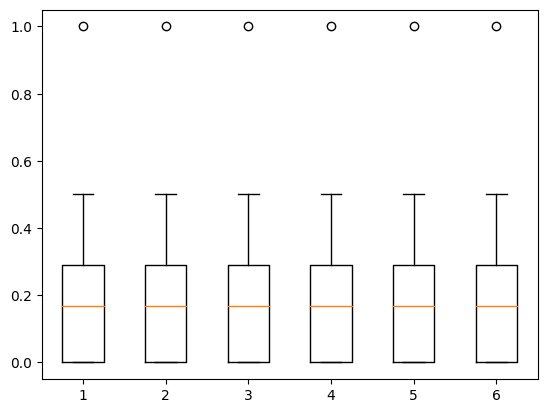

In [48]:
plt.boxplot(df.iloc[:,:6])
plt.show()

weigths

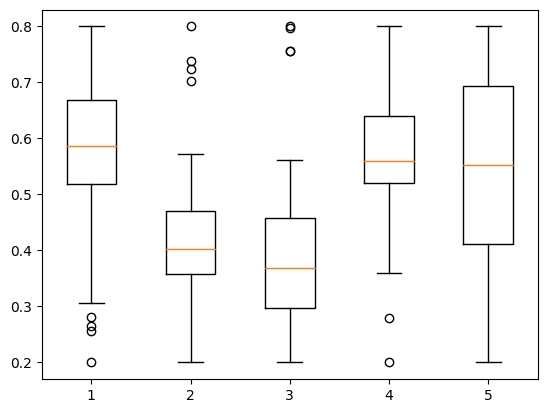

In [49]:
plt.boxplot(df.iloc[:,7:])
plt.show()

Removing influential points



In [50]:
df.shape

(63, 12)

**Menthod1** : Z Score

In [51]:
z_scores = np.abs(stats.zscore(df))
threshold = 3
df_clean = df[(z_scores < threshold).all(axis=1)]
df_clean.shape


(57, 12)

In [52]:
df[~(z_scores < threshold).all(axis=1)]

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.0,1.0,0.0,0.0,0.0,0.0,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.0,0.0,1.0,0.0,0.0,0.0,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.0,0.0,0.0,1.0,0.0,0.0,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.0,0.0,0.0,0.0,1.0,0.0,0.326615,0.306501,0.432452,0.209289,0.72,0.447059
5,0.0,0.0,0.0,0.0,0.0,1.0,0.200000,0.200000,0.490882,0.429063,0.20,0.235294


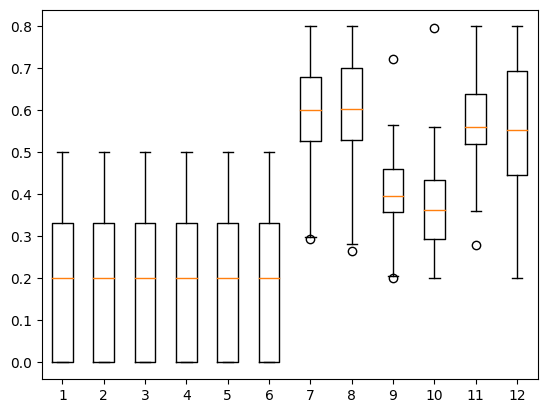

In [53]:
plt.boxplot(df_clean)
plt.show()

In [54]:
df_clean = df

In [55]:
weight_df = df_clean.iloc[:,:6].copy()
outputs_df = df_clean.iloc[:,-6:].copy()

Corelation matrix

In [56]:
corr_matrix = weight_df.corr()
corr_matrix

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
Large B/P,1.0,-0.2,-0.2,-0.2,-0.2,-0.2
Large ROE,-0.2,1.0,-0.2,-0.2,-0.2,-0.2
Large S/P,-0.2,-0.2,1.0,-0.2,-0.2,-0.2
Large Return Rate in the last quarter,-0.2,-0.2,-0.2,1.0,-0.2,-0.2
Large Market Value,-0.2,-0.2,-0.2,-0.2,1.0,-0.2
Small systematic Risk,-0.2,-0.2,-0.2,-0.2,-0.2,1.0


using seaborn

<Axes: >

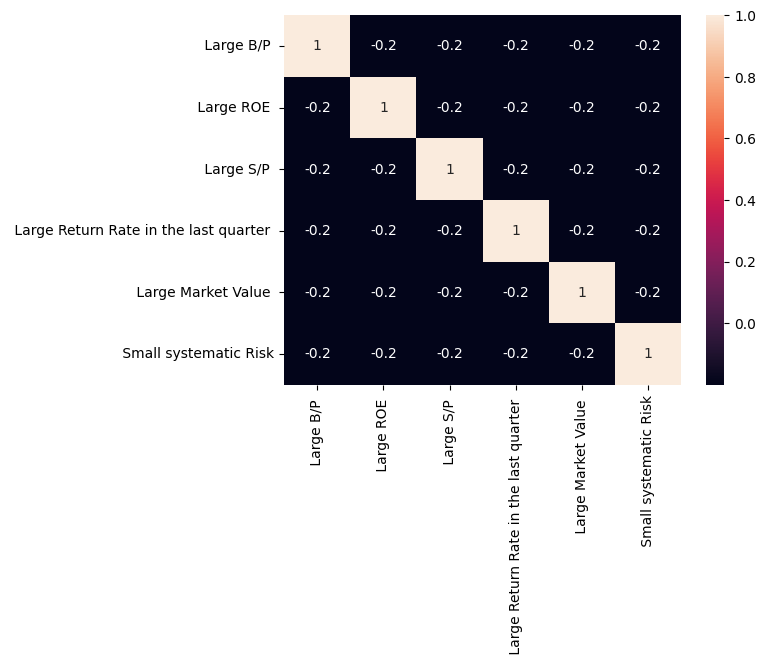

In [57]:
sns.heatmap(corr_matrix, annot=True)

Bartlett's sphericity test

In [58]:
# Perform Bartlett's sphericity test
chi_square_value, p_value = calculate_bartlett_sphericity(weight_df)

# Print the test results
print('Bartlett Sphericity Test:')
print("Chi-square value:", chi_square_value)
print("P-value:", p_value)


Bartlett Sphericity Test:
Chi-square value: 749.0536602587168
P-value: 6.429146777304694e-150


PCA

In [59]:
weight_df.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
cov_mat = np.cov(weight_df.values, rowvar=False)

# Step 3: Compute the eigenvectors and eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print(eig_vals)

[4.76666774e-02 5.06912442e-08 4.76666774e-02 4.76666774e-02
 4.76666774e-02 4.76666774e-02]


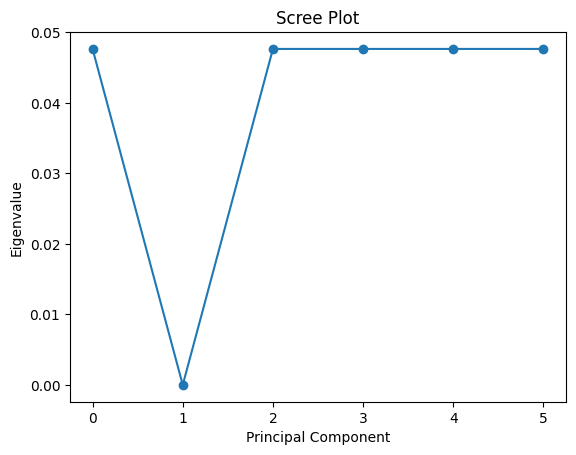

In [61]:

# Step 4: Plot the eigenvalues in a scree plot
plt.plot(np.arange(0,6), eig_vals, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()


In [62]:
n_components = 5 # replace with your choice

pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(df)

Test of assumptions

1.Homoscedasticity

2.Normality

In [63]:
from scipy.stats import normaltest
for i in range(5):
    print(f'Normality test result for column {i}:',normaltest(data_pca[:, i]))

Normality test result for column 0: NormaltestResult(statistic=5.440474130742268, pvalue=0.06585913965423051)
Normality test result for column 1: NormaltestResult(statistic=3.9621621564177127, pvalue=0.13792005432089197)
Normality test result for column 2: NormaltestResult(statistic=4.594087849871954, pvalue=0.1005556548725624)
Normality test result for column 3: NormaltestResult(statistic=4.035613514120197, pvalue=0.13294673003299248)
Normality test result for column 4: NormaltestResult(statistic=2.467713533691952, pvalue=0.29116744444088705)


3.Multi Colinearity

**VIF**

In [64]:
for i in range(5):
    print(f'VIF of column {i}: {variance_inflation_factor(data_pca,i):.2f}')

VIF of column 0: 1.00
VIF of column 1: 1.00
VIF of column 2: 1.00
VIF of column 3: 1.00
VIF of column 4: 1.00


4.Auto Corelation

**DW test**

In [65]:
dw_test = durbin_watson(data_pca, axis=0)

print('DW statistic for each column:', dw_test)

DW statistic for each column: [1.92880016 1.8952121  1.47743874 2.15861333 2.50857133]


Remedy

In [66]:
arr = np.delete(data_pca, [2,4], axis=1)
# print(arr)
dw_test = durbin_watson(arr, axis=0)
print('DW statistic for each column:', dw_test)

DW statistic for each column: [1.92880016 1.8952121  2.15861333]


**MODEL**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(arr,outputs_df, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
print('R^2 score:', score)

R^2 score: 0.4930863143245347
